<a href="https://colab.research.google.com/github/KillerStrike17/EVA---Session4-99.4-Accuracy-under-15k-Parameters-/blob/master/Session4_First_Iteration_of_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

## Approach
The problem given is to achieve 99.4% Accuracy under 15K parameters. So initially we have to write a basic network which gives a decent Accuracy and then slowly make changes (either by varing learning rate, batch size, epochs,dropouts, normalization, etc. ) and and observe the accuracy.
###GOAL
To develop a Deep Neural Network under 15K Parameters

###Way to asses the Developed Network
 Run the created network and observe the validation accuracy for initial few epochs, if it is better than the previous one then this network can perform well but if the developed network doesnot give a better accuracy than the previous one then it is better to change the network.
 
 ### Next Step
  Observe the training and validation accuracy and make decisions accordinly in the next iteration.

In [1]:
# https://keras.io/
#to install keras library
#'!'allows bash command to run
#in notebook
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#importing numpy
import numpy as np
#by importing specific modules of keras
#import time is saved
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
#importingg the mnist dataset
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
#Loading the MNIST dataset and string in the varibles.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


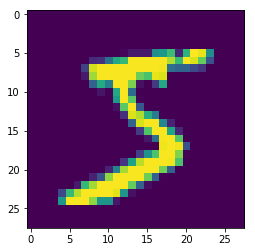

In [4]:
#displaing thr shape of training dataset.
print (X_train.shape)
#importing matplotlib libraries to plot graphs
from matplotlib import pyplot as plt
#this helps in plotting the graphs in notebook
%matplotlib inline
#plotting the graph via imshow function call
#this function has X-train[0] as parameter,
#hence displaying the first image, user can change 
#0 to any positive value under
#60000(as training size in 60000) to view other data entries. 
plt.imshow(X_train[0])

In [0]:
#reshaping the training and testing images,
#representing the images in 3 Dimension.
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#chaning the training and testing image datatype
#to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#The data contains pixel values ranging
#from 0-255, hence dividing all value by 255
#so that the data comes in range of 0-1
X_train /= 255
X_test /= 255

In [7]:
#displaying the first 10 values of y_train array
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# As the total number of classes are 10
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10))

In [9]:
#Displaying the first 10 entries of Y_train variable
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Neural Network
This is the developed Neural Network, if every layer, receptive field and channel output in written in the format(Field, Channel, Output)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))
#Layer 1(3x3,10,26)

model.add(Convolution2D(18, 3, 3, activation='relu'))
#Layer 2(5x5,18,24)
model.add(Convolution2D(12, 3, 3, activation='relu'))
#Layer 3(7x7,12,22)

model.add(MaxPooling2D(pool_size=(2, 2)))
#Layer 4(14x14,12,11)
model.add(Convolution2D(10, 1, 1, activation='relu'))
#Layer 5(16x16,10,11)

model.add(Convolution2D(18, 3, 3, activation='relu'))
#Layer 6(18x18,18,9)
model.add(Convolution2D(12, 3, 3, activation='relu'))
#Layer 7(20x20,12,7)

model.add(Convolution2D(10, 1, activation='relu'))
#Layer 8(22x22,10,7)
model.add(Convolution2D(10, 7))
#Layer 8(24x24,10,1)
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

In [11]:
#Display the summary of the model i.e. layers, output, parameter 
#generated
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 18)        1638      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 12)        1956      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 12)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 10)        130       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 18)          1638      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 12)          1956      
__________

In [0]:
#compile function is used after the model is loaded
#it is used to give the loss function, optimizer and metrics data
#Here the loss function is categotical_crossentrophy, optimzer is adam
# and metrics is accuracy.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
#Fit function is used to train the model, The batch size here is 32 
#meaning after a set of 32 data entries is taken at a time.
#Total epochs is 10, meaning 60000 images will be loaded 10 times 
#fully in the system. Verbose is a parameter which is set for displaying the
#output at every iteration.
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.2102 - acc: 0.9353 - val_loss: 0.0674 - val_acc: 0.9787
Epoch 2/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0715 - acc: 0.9780 - val_loss: 0.0507 - val_acc: 0.9846
Epoch 3/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0545 - acc: 0.9836 - val_loss: 0.0379 - val_acc: 0.9876
Epoch 4/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0460 - acc: 0.9858 - val_loss: 0.0379 - val_acc: 0.9880
Epoch 5/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0390 - acc: 0.9882 - val_loss: 0.0371 - val_acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.0347 - acc: 0.9894 - val_loss: 0.0309 - val_acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0312 - acc: 0.9901 - val_loss: 0.

In [0]:
#model.evaluate will return the loss and accuracy obtained
#over the testing data
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)# will display the value stored in variable score

[0.035074360758063264, 0.9896]


In [0]:
#Trained model is run over the testing data
#and the predicted output in stored in y_pred 
#variable.
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])#Will display the predicted values
print(y_test[:9])#Will display the actual values

[[7.33350803e-16 5.87772192e-12 2.67031758e-10 1.54013371e-08
  1.17758783e-21 4.79266048e-14 4.12327439e-25 1.00000000e+00
  1.00248033e-12 8.01762878e-10]
 [5.99139582e-09 1.86155014e-09 1.00000000e+00 5.29979071e-15
  1.81481732e-16 4.70400730e-14 1.40835210e-08 1.09955168e-14
  7.19013737e-10 2.84911517e-15]
 [3.58588252e-08 9.99975920e-01 8.60154842e-07 3.81525789e-09
  5.97122744e-06 1.00665866e-05 4.17824225e-07 5.17353465e-06
  1.30550961e-06 3.95512586e-07]
 [9.99979734e-01 7.90186579e-12 6.70280942e-09 2.77368262e-09
  2.50207472e-12 2.92895862e-07 1.93233591e-05 7.67181110e-11
  5.03859553e-07 1.26183352e-07]
 [1.81998783e-09 8.19089669e-14 1.11255692e-10 4.75385844e-13
  9.99949813e-01 3.69971637e-10 4.63981131e-10 3.05756679e-12
  2.47739967e-10 5.01594077e-05]
 [4.47154150e-07 9.99979854e-01 1.82798794e-06 7.00664415e-10
  7.08597554e-07 9.93279446e-06 6.43702691e-08 5.22476421e-06
  6.74171815e-07 1.21358914e-06]
 [1.44505076e-20 1.95307414e-16 8.12250354e-12 1.26132842e

In [0]:
#creating a dictionary of layer name and layer that the model has in layer_dict
#variable.
layer_dict = dict([(layer.name, layer) for layer in model.layers])


This will visualize the input image and applied filter over the image


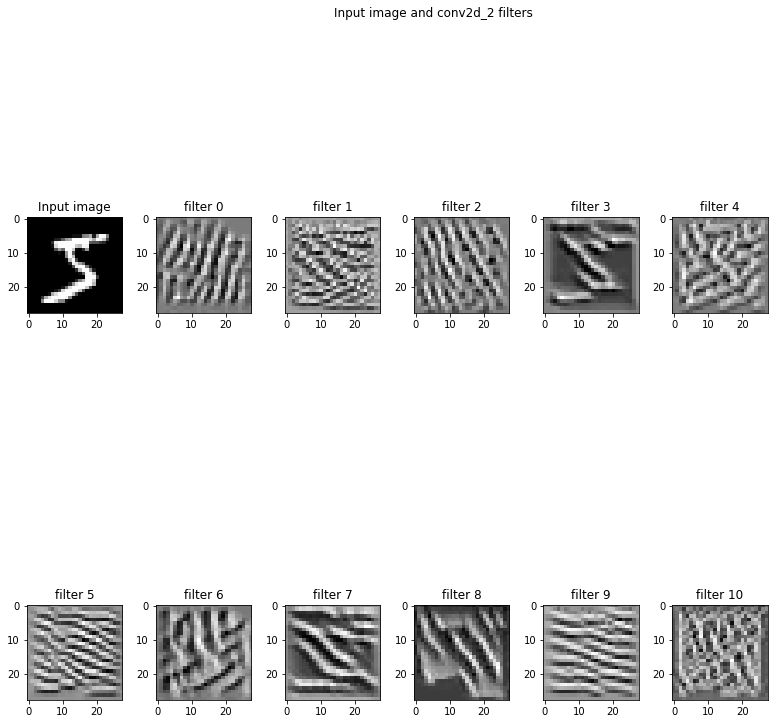

In [29]:
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()